In [3]:
import numpy as np
import matplotlib.pyplot as plt

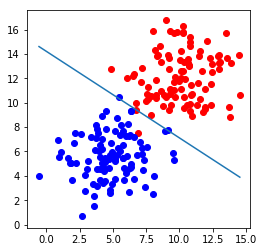

In [4]:
def draw(x1, x2):
    ln = plt.plot(x1, x2)

def sigmoid(score):
    return 1/(1 + np.exp(-score))

def calculate_error(line_parameters, points, y):
    m = points.shape[0]
    p = sigmoid(points*line_parameters)
    cross_entropy = -(1/m)*(np.log(p).transpose() * y + np.log(1-p).transpose()*(1-y))
    return cross_entropy

def gradient_descent(line_parameters, points, y, alpha):
    m = points.shape[0]
    for i in range(5000):
        p = sigmoid(points*line_parameters)
        gradient = (1/m)*(points.T * (p - y))
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        x1 = np.array([points[:, 0].min(), points[:, 0].max()])
        x2 = -b / w2 + x1 * (-w1 / w2)
    draw(x1,x2)

n_pts = 100
np.random.seed(0)
bias = np.ones(n_pts)
top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12,2,n_pts), bias]).transpose()
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6,2,n_pts), bias]).transpose()
all_points = np.vstack((top_region, bottom_region))

line_parameters = np.matrix([np.zeros(3)]).T
# x1 = np.array([bottom_region[:, 0].min(), top_region[:, 0].max()])
# w1x1 + w2x2 + b = 0
# x2 = -(b + w1x1) / w2
# x2 = -b / w2 + x1 * (-w1 / w2)
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)

_, ax = plt.subplots(figsize=(4,4))
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')
gradient_descent(line_parameters, all_points, y, 0.06)
plt.show()